**probability density function** - derivative of a CDF.  Evaluating for x gives a probability density or "the probability per unit of x.  In order to get a probability mass, you have to integrate over x.

Pdf class probides...
* `Density` take a value, x and returns the density at x
* `Render` evaluates the density at a discrete set of values and returns a pair of sequences: sorted values, xs, and their probabilty densities.
*  `MakePmf`, evaluates Density at a discrete set of values and returns a normalized Pmf that approximates the Pdf.
*  `GetLinspace`, returns the default set of points used by Render and MakePmf

...but they are implemented in children classes

In [1]:
%matplotlib inline
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np
import math, random

ERROR! Session/line number was not unique in database. History logging moved to new session 51
Density: 0.0333001249896


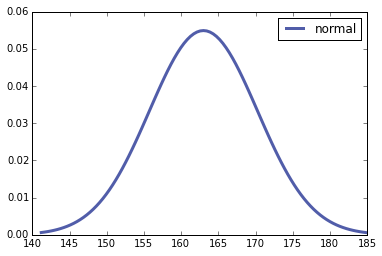

In [9]:
mean, var = 163, 52.8
std = math.sqrt(var)
pdf = thinkstats2.NormalPdf(mean, std)
print "Density:",pdf.Density(mean + std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Show()

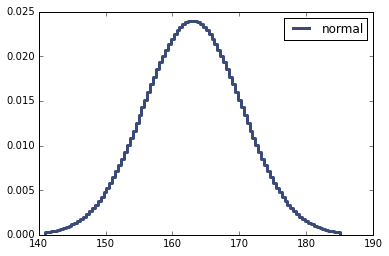

In [10]:
#by default, makes pmf stetching 3*sigma in either direction
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf,label='normal')
thinkplot.Show()

**Kernel density estimation** - an algorithm that takes a sampel and finds an approximately smooth PDF that fits the data.

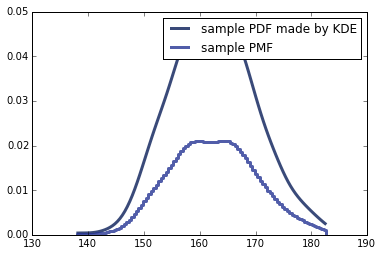

In [11]:
sample = [random.gauss(mean, std) for i in range(500)]
sample_pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(sample_pdf, label='sample PDF made by KDE')

##Evaluates PDF at 101 points
pmf = sample_pdf.MakePmf()
thinkplot.Pmf(pmf, label='sample PMF')
thinkplot.Show()

####Advantages of KDE:

*  *Visualiztion* - estimated pdf are  easy to get when you look at them.
*  *Interpolation* - If you think smooth, you can use KDE to estimate the in-between values in a PDF.
*  *Simulation* - smooths out a small sample allowing for wider degree of outcomes during simulations

**discretizing a PMF** if you evaluate a PDF at discrete points, you can generate a PMF that is an approximation of the PDF. 

**statistic** Any time you take a sample and reduce it to a single number, that number is a statistic.

**raw moment** if you have a sample of values, $x_i$, the $k$th raw moment is:

$$
m'_k = \frac{1}{n} \sum_i x_i^k
$$

when k = 1 the result is the sample mean.

**central moments** are more useful...

In [12]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

...note that when k = 2, the second central moment is variance.

If we attach a weight along a ruler at each location, $x_i$, and then spin the ruler around the mean, the moment of inertia of the spinning weights is the variance of the values

**Skewness** describes the shape of a distribution.  Negative means distribution skews left.  Positive means skews right.  To compute **sample skewness** $g1$...


In [13]:
##normalized so there are no units
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

**Pearson's median skewness coefficient** is a measure of the skewness based on the difference between the sample mean and median:
$$
g_p = 3(\bar{x}-m)/S
$$

It is a more **robust** statistic than sample skewness because it is less sensitive to outliers.

In [18]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

###To summarize the Moments:

the mean is a raw moment with k = 1

the variance is a central moment with k = 2

the sample skewness is a standardized moment with k = 3

note that Pearson Median Skewness is a more robust measure of skewness.


##Exercise

In [6]:
import hinc, hinc2

print "starting..."
df = hinc.ReadData()
log_sample = hinc2.InterpolateSample(df)

log_cdf = thinkstats2.Cdf(log_sample)
print "done"
# thinkplot.Cdf(log_cdf)
# thinkplot.Show(xlabel='household income',
#                ylabel='CDF')



starting...
done


Compute the mean, median, skewness, and Pearson's skewness.  What fraction of households report a taxable income below the mean?

In [30]:
import density

sample = np.power(10,log_sample)
mean, median = density.Summarize(sample)


mean 74278.7075312
std 93946.9299635
median 51226.4544789
skewness 4.94992024443
pearson skewness 0.736125801914


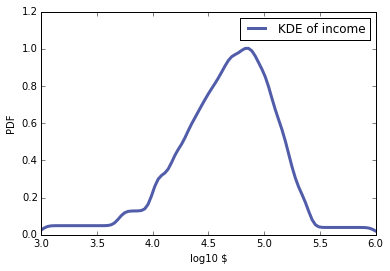

In [21]:
log_pdf = thinkstats2.EstimatedPdf(log_sample)
thinkplot.Pdf(log_pdf, label='KDE of income')
thinkplot.Show(xlabel='log10 $',
               ylabel='PDF')

66% of households report taxable incomes below the mean


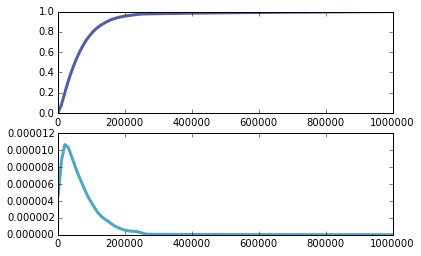

In [37]:
thinkplot.PrePlot(2, rows=2)
thinkplot.SubPlot(1)
sample_cdf = thinkstats2.Cdf(sample, label='SampleCdf')
thinkplot.Cdf(sample_cdf)

thinkplot.SubPlot(2)
sample_pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(sample_pdf)
pctBelowMean = sample_cdf.Prob(mean) * 100
print "%d%% of households report taxable incomes below the mean" % pctBelowMean